In [51]:
from bokeh.plotting import figure, output_notebook, output_file, show
import numpy as np
import datashader
from bokeh.tile_providers import STAMEN_TERRAIN, STAMEN_TONER_BACKGROUND, get_provider
from bokeh.models import (
    Range1d, WMTSTileSource, ColumnDataSource, HoverTool
)

output_notebook()
tile_provider = get_provider(STAMEN_TERRAIN)

def plot_gps(lon, lat, line_width=0.1):
    plot_width  = int(600)
    plot_height = int(plot_width//1.2)
    x, y = datashader.utils.lnglat_to_meters(lon, lat)
    x_range = Range1d(start=x.min()-200, end=x.max()+200, bounds=None)
    y_range = Range1d(start=y.min()-200, end=y.max()+200, bounds=None)
    p = figure(tools='wheel_zoom,pan,reset,hover,save', x_range=x_range, y_range=y_range,
               plot_width=plot_width, plot_height=plot_height)
    p.add_tile(tile_provider)
    
    p.line(x=x, y=y, line_width=line_width)
    p.circle(x=x, y=y, size=5, fill_color="#F46B42", line_color=None, line_width=1.5)
    return p

Loading BokehJS ...

In [52]:
 lon = [
 104.06353218677413,
 104.06351211521596,
 104.06362189930653,
 104.06468993545157,
 104.06494932988433,
 104.06370150500595,
 104.06318232948773,
 104.06312232566172,
 104.06372109390708,
 104.06523824042183,
 104.06526818574385,
 104.06526818574385,
 104.06585710976658,
 104.06826289423002,
 104.06896172068274,
 104.06896172068274,
 104.06896172068274,
 104.06934107268944,
 104.06990006158216,
 104.07052893204693,
 104.07063874100932,
 104.07063874100932,
 104.07063874100932,
 104.0707585171932,
 104.07082827260723,
 104.07082824644459,
 104.07082821431429,
 104.0708280977201,
 104.07086795699414,
 104.07000923249794,
 104.06727364011532,
 104.06727358372147,
 104.06568628997165,
 104.06395939423085,
 104.06276164104902]

In [53]:
lat = [
 30.65613292694022,
 30.65851192339458,
 30.65876165747834,
 30.65888010287173,
 30.661898427482775,
 30.664139191190454,
 30.66731853517402,
 30.669867491601853,
 30.67231553919826,
 30.674392495656313,
 30.674422441497097,
 30.674422441497097,
 30.675221289827157,
 30.67845674864273,
 30.679465444129505,
 30.679465444129505,
 30.679465444129505,
 30.680474535435298,
 30.683472518542718,
 30.687080149517033,
 30.687619778045217,
 30.687619778045217,
 30.687619778045217,
 30.6885592118679,
 30.69159773247689,
 30.692167468912398,
 30.692867144882964,
 30.695405965855134,
 30.69716510137264,
 30.697835761514085,
 30.697869063361136,
 30.69909848820944,
 30.699610323105077,
 30.69976263251707,
 30.69969439079794
]


In [170]:
lon = [126.5689, 126.571915, 126.57412, 126.575424, 126.579025, 126.583374, 126.56407, 126.55477, 126.548965, 126.55137, 126.55466, 126.555244, 126.55492, 126.55624, 126.556755,
 126.55692, 126.55625, 126.55469, 126.552475, 126.55118600000002, 126.54875, 126.546646, 126.53782, 126.53206000000002, 126.5313, 126.53842, 126.54468500000002, 126.55189]

In [172]:
lat = [45.696186, 45.69422, 45.692707, 45.692085, 45.694103000000005, 45.69119, 45.68133, 45.678340000000006, 45.673695, 45.6762, 45.67486, 45.67456, 45.673687, 45.67326, 45.67415, 45.674225, 45.673233, 45.673725, 45.671352, 45.671890000000005, 45.672825, 45.67366, 45.67716, 45.683502, 45.691856, 45.698338, 45.703068, 45.70852]

In [113]:
import h5py
import numpy as np
with h5py.File("/Project0551/jingyi/deepgtt/data/trainpath-fmm-spatial/150103.h5") as f:
        S = np.transpose(f["/1/S"]).copy()
        lon = np.array(f["/1/lon/3"]).copy()
        lat = np.array(f["/1/lat/3"]).copy()
        trip = np.array(f["/1/trip/3"]).copy()
        times = np.array(f["/1/times/3"]).copy()
        

/home/jingyi/fyp/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
lon = lon + lon_min
lat = lat + lat_min
lon_min = 126.506130
lat_min = 45.657920
print(lon)
print(lat)
print(trip)
print(times)

[126.69486  126.68664  126.678246 126.66871  126.66612  126.66504
 126.65984  126.65494  126.65362 ]
[45.729713 45.72802  45.726093 45.72527  45.731327 45.730453 45.731876
 45.73353  45.73392 ]
[  222   223    74    75   763 13992  1213  8652 13989 14007 14012  1211
  5592  5572]
[23670750.1        23670751.15       23670752.18333333 23670753.23333333
 23670754.26666667 23670755.3        23670756.35       23670757.38333333
 23670758.43333333]


In [115]:
[11366, 2757, 2761, 2758, 11366, 2757, 2761, 2757, 2761, 2757, 2761, 2757, 2762]

[11366,
 2757,
 2761,
 2758,
 11366,
 2757,
 2761,
 2757,
 2761,
 2757,
 2761,
 2757,
 2762]

In [155]:
query = "LINESTRING("
for i in range(len(lon)):
    if i != len(lon) - 1:
        query = query + str(lon[i]) + " " + str(lat[i]) + ","
    else:
        query = query + str(lon[i]) + " " + str(lat[i]) + ")"
print(query)

LINESTRING(126.5689 45.696186,126.571915 45.69422,126.57412 45.692707,126.575424 45.692085,126.579025 45.694103000000005,


In [156]:
126.57818600000002

126.57818600000002

In [173]:
linestr = 'LINESTRING(126.681114 45.726547,126.68086 45.726690000000005,126.6804 45.72699,126.680855 45.72668,126.68082 45.727325,126.680756 45.72687,126.68115 45.726387,126.681366 45.726635,126.68056 45.7261,126.6806 45.726097,126.68088 45.726345)'
show(plot_gps(lon, lat))

In [150]:
import socket
import sys

HOST, PORT = "localhost", 1235
data = " ".join(sys.argv[1:])

# Create a socket (SOCK_STREAM means a TCP socket)
with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as sock:
    # Connect to server and send data
    sock.connect((HOST, PORT))
    sock.sendall(bytes(query + "\n", "utf-8"))

    # Receive data from the server and shut down
    received = str(sock.recv(102400), "utf-8")

print("Sent:     {}".format(data))
print("Received: {}".format(received))

Sent:     -f /home/jingyi/.local/share/jupyter/runtime/kernel-3c76cd64-3902-4e4a-a0fc-35d391449688.json
Received: {"state": 1, "pgeom_wkt": "LINESTRING(126.56891 45.696196,126.57194 45.694252,126.5741 45.692673,126.57542 45.692052,126.57884 45.694331,126.58318 45.690944,126.56412 45.681181,126.55475 45.678393,126.54885 45.673788,126.55121 45.676393,126.55304 45.677655,126.55374 45.677995,126.55374 45.67054,126.55495 45.670049,126.55508 45.669994,126.5552 45.669948,126.55652 45.669416,126.55355 45.67086,126.55245 45.671296,126.55116 45.671813,126.54875 45.672836,126.54666 45.673688,126.53783 45.677191,126.5321 45.683524,126.53124 45.691855,126.5384 45.698363,126.54472 45.703017,126.55189 45.708524)", "cpath": [8297, 8295, 12236, 8120, 8123, 8136, 8126, 7672, 1680, 8124, 12235, 8140, 5616, 8302, 8305, 8069, 8078, 8165, 8191, 8197, 11989, 8206, 11990, 2959, 2961, 557, 8018, 8021, 8015, 8009, 13087, 1708, 8001, 1747, 1701, 4443, 1695, 4349, 1694, 8685, 8725, 8764, 8113, 4079, 1680, 8124, 1

In [151]:
import json
info = json.loads(received)
print(len(info['indices']))
info['indices']

28


[0,
 2,
 2,
 3,
 4,
 6,
 41,
 77,
 113,
 113,
 113,
 113,
 148,
 148,
 148,
 148,
 149,
 153,
 153,
 153,
 153,
 156,
 158,
 159,
 160,
 163,
 166,
 168]

In [152]:
dist = info['spdist']
print(dist)
print(len(dist))

[0.0, 0.003602497785555044, 0.002672914734502878, 0.0016288849603489012, 0.00411121626772281, 0.00550468217446508, 0.12839298919728137, 0.1324554322709097, 0.134602529033305, 0.0035248463819210233, 0.0022257155238274784, 0.000783589721102978, 0.14059973090803465, 0.0013022021693439205, 0.00014527840037526722, 0.00012504182133045699, 0.001423826284376096, 0.0783680760192694, 0.0011795230200848713, 0.0013965839863318494, 0.0026096016227723767, 0.0022640680675736027, 0.00949850176767197, 0.008908342411469641, 0.008811619827963302, 0.009776271359181707, 0.007850396537804593, 0.009038467107589883]
28


In [154]:
import math
def gps2webmercator(lon, lat):
    """
    Converting GPS coordinate to Web Mercator coordinate
    """
    semimajoraxis = 6378137.0
    east = lon * 0.017453292519943295
    north = lat * 0.017453292519943295
    t = np.sin(north)
    return semimajoraxis * east, 3189068.5 * np.log((1 + t) / (1 - t))

x, y = gps2webmercator(np.array(lon), np.array(lat))
print(x)
print(y)
dis_eu = [0.0]
for i in range(len(x) - 1):
    dis_eu.append(math.sqrt((x[i + 1] - x[i]) * (x[i + 1] - x[i]) + (y[i + 1] - y[i]) * (y[i + 1] - y[i])))
print(dis_eu[:10])
print(dist[:10])

[14089585.49826476 14089921.12652951 14090166.5860067  14090311.7466227
 14090712.60810905 14091196.7365745  14089047.82512423 14088012.55385985
 14087366.3442158  14087634.06759116 14088000.30871587 14088065.31929849
 14088029.25178347 14088176.19351132 14088233.52304908 14088251.89076506
 14088177.30670623 14088003.64830059 14087757.07562848 14087613.58480485
 14087342.41052528 14087108.19431665 14086125.68849091 14085484.48822394
 14085399.88541093 14086192.48018538 14086889.89679521 14087691.95372637]
[5731795.76735368 5731482.43608878 5731241.30920267 5731142.18292349
 5731463.78956017 5730999.55138542 5729428.36504872 5728951.96467911
 5728211.92161808 5728611.01148269 5728397.5240635  5728349.72907299
 5728210.64710821 5728142.6204081  5728284.40966698 5728296.35830305
 5728138.31897144 5728216.70103173 5727838.65732567 5727924.36494455
 5728073.31973677 5728206.34563873 5728763.96083663 5729774.44843912
 5731105.68815624 5732138.75499874 5732892.67293742 5733761.75008802]
[0.0,

In [140]:
import geopandas as gpd

In [141]:
ways = gpd.read_file('/home/jingyi/fyp/fmm/example/data/harbin.tmp/edges.shp')

<AxesSubplot:>

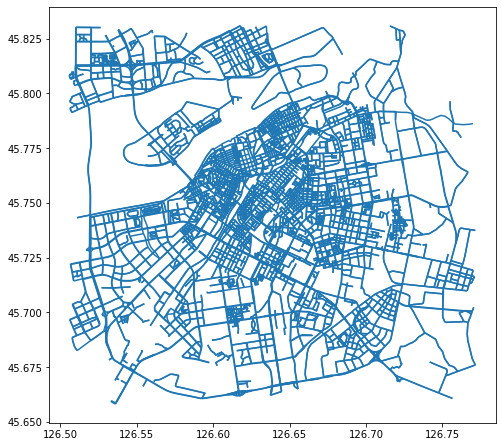

In [142]:
ways.plot(figsize=(8, 8))

557        557
1680      1680
1694      1694
1695      1695
1701      1701
1708      1708
1747      1747
2959      2959
2961      2961
4349      4349
4443      4443
5616      5616
7672      7672
8001      8001
8009      8009
8015      8015
8018      8018
8021      8021
8069      8069
8078      8078
8120      8120
8123      8123
8124      8124
8126      8126
8136      8136
8140      8140
8165      8165
8191      8191
8197      8197
8206      8206
8295      8295
8297      8297
8302      8302
8305      8305
8685      8685
11989    11989
11990    11990
12235    12235
12236    12236
13087    13087
Name: fid, dtype: int64


<AxesSubplot:>

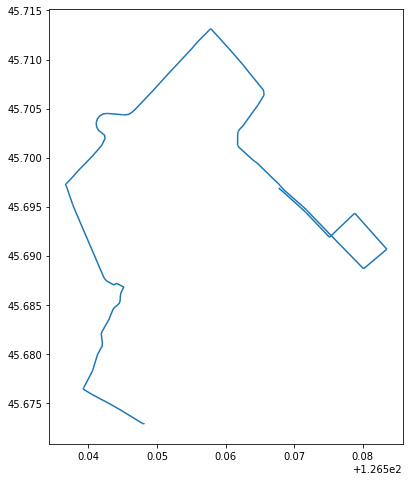

In [168]:
path = [8297, 8295, 12236, 8120, 8123, 8136, 8126, 7672, 1680, 8124, 12235, 8140, 5616, 8302, 8305, 8069, 8078, 8165, 8191, 8197, 11989, 8206, 11990, 2959, 2961, 557, 8018, 8021, 8015, 8009, 13087, 1708, 8001, 1747, 1701, 4443, 1695, 4349, 1694, 8685, 8725, 8764, 8113, 4079, 1680, 8124, 12235, 8140, 5616, 8302, 8305, 8069, 8078, 8165, 8191, 8197, 11989, 8206, 11990, 2959, 2961, 557, 8018, 8021, 8015, 8009, 13087, 1708, 8001, 1747, 1701, 4443, 1695, 4349, 1694, 8685, 8725, 8764, 8113, 4079, 1680, 8124, 12235, 8140, 5616, 8302, 8305, 8069, 8078, 8165, 8191, 8197, 11989, 8206, 11990, 2959, 2961, 557, 8018, 8021, 8015, 8009, 13087, 1708, 8001, 1747, 1701, 4443, 1695, 4349, 1694, 8685, 8725, 8764, 8113, 4079, 1680, 8124, 12235, 8140, 5616, 8302, 8305, 8069, 8078, 8165, 8191, 8197, 11989, 8206, 11990, 2959, 2961, 557, 8018, 8021, 8015, 8009, 13087, 1708, 8001, 1747, 1701, 4443, 1695, 4349, 1694, 8686, 8662, 9475, 9478, 8884, 8887, 9480, 8677, 8763, 4447, 8744, 4445, 7980, 7982, 7987, 7992, 8002, 8003, 1710, 1722, 1712, 1714]
# for i in range(len(path)):
#     path[i] += 1
road = ways[ways.fid.isin(path[:40])]
print(road.fid)
road.plot(figsize=(8, 8))

In [145]:
import torch
ratio = torch.ones((3, 3))

In [37]:
ratio

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [42]:
def pad_array(a, max_length, PAD=0):
    """
    a (array[int32])
    add one to all elements of a
    """
    return np.concatenate((a + 1, [PAD]*(max_length - len(a))))


def pad_arrays_float(a, length=0):
    # pad to the longest seq_len of a batch or a specified length
    if length == 0:
        max_length = max(map(len, a))
    else:
        max_length = length
    a = [pad_array(a[i], max_length) for i in range(len(a))]
    a = np.stack(a).astype(np.int)
    return torch.FloatTensor(a)

a = torch.tensor([[0.00023746, 0.00329468], [0.3,0.4], [0.4,0.5]])
a_pad = pad_arrays_float(a)
a_pad.shape
ratio.shape

torch.Size([3, 3])

In [43]:
ratio[:, 0] = torch.ones(list(ratio.shape)[0]) - a_pad[:, 0]

In [44]:
ratio

tensor([[0., 1., 1.],
        [0., 1., 1.],
        [0., 1., 1.]])